## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Author: Irshad Yasseen A


# Import Dependencies 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Read Dataframe

In [42]:
df=pd.read_csv("student_scores - student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<Axes: >

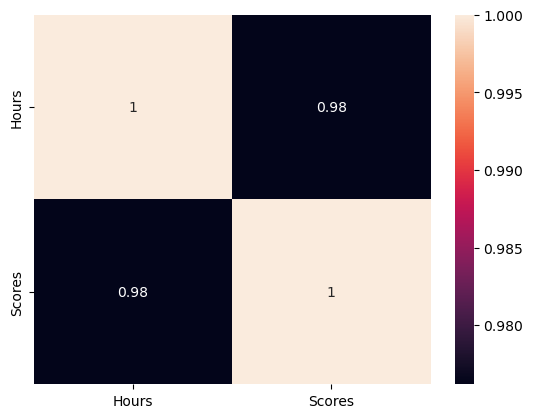

In [43]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

# Split input and target variables

In [44]:
X = df[['Hours']].values
y = df['Scores'].values


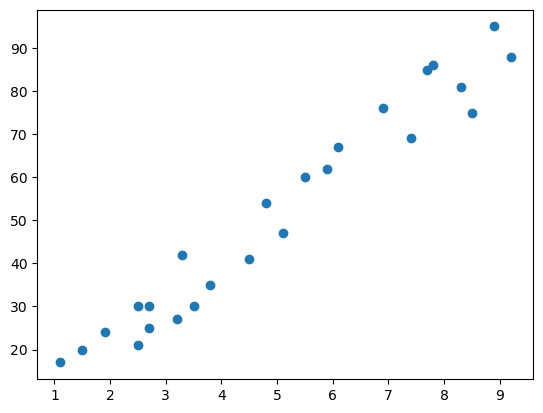

In [66]:
plt.scatter(X.reshape(-1,1),y.reshape(-1,1))

# Build Model

In [52]:
model = LinearRegression()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Visualizing result

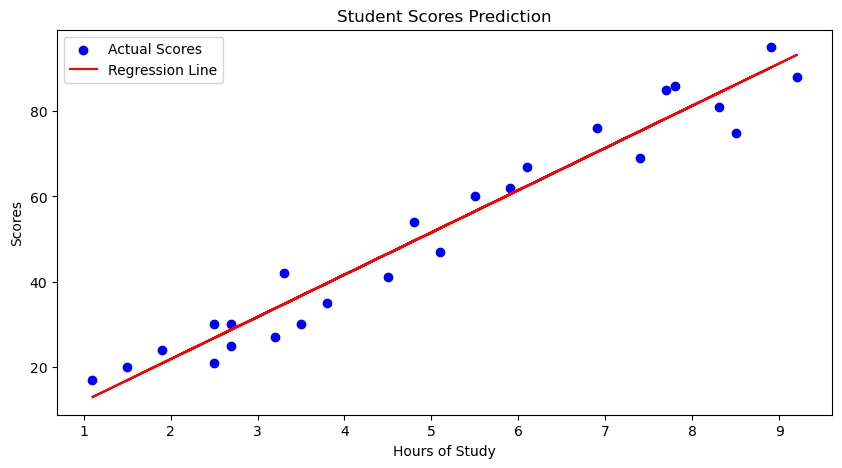

In [78]:
model.fit(X_train,y_train)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label='Actual Scores')
plt.plot(X, model.predict(X), color='red', label='Regression Line')

plt.title('Student Scores Prediction')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.legend()
plt.show()


In [81]:
model.coef_,model.intercept_

(array([9.91065648]), 2.018160041434683)

# ***Evaluating Model***

## Cross-validation Score

In [58]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Median CV Score:", np.median(cv_scores))


Cross-Validation Scores: [0.78626426 0.97891923 0.93182467 0.96604831 0.9273292 ]
Median CV Score: 0.9318246738821696


# Accuracy measures

In [68]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, model.predict(X_test))) 

Mean Absolute Error: 4.183859899002975


In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ptest=model.predict(X_test)
test_mae = mean_absolute_error(y_test, ptest).round(3)
test_rmse = mean_squared_error(y_test, ptest, squared=False).round(3)
test_r2 = r2_score(y_test, ptest).round(3)

test_data={'Metric': ['MAE', 'RMSE', 'R2'], 'Test': [test_mae,test_rmse, test_r2]}
lr_test_metric=pd.DataFrame(test_data,index=[test_data['Metric']]).drop("Metric",1)
lr_test_metric

C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_60824\1541492972.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lr_test_metric=pd.DataFrame(test_data,index=[test_data['Metric']]).drop("Metric",1)


,Test
MAE,4.184
RMSE,4.647
R2,0.945


# What is the predicted score of the score if a student studies for 9.25 hr/day

In [57]:
model.predict([[9.25]])

array([93.69173249])